In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [36]:
from google.colab import files
uploaded = files.upload()

Saving data_clean (1).csv to data_clean (1) (2).csv


In [37]:
data_clean = pd.read_csv('data_clean (1).csv')
data_clean

,Unnamed: 0,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married,Dclust
0,0,58138.0,7,66,0,1269,21,1,0,0,0,0
1,1,46344.0,5,69,2,18,4,1,0,0,0,0
2,2,71613.0,4,58,0,602,11,1,0,0,1,0
3,3,26646.0,6,39,1,35,4,1,0,0,1,0
4,4,58293.0,5,42,1,334,13,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2190,61223.0,5,56,1,934,14,1,0,0,1,0
2190,2191,64014.0,7,77,3,436,17,0,1,0,1,0
2191,2192,56981.0,6,42,0,1173,6,1,0,0,0,0
2192,2193,69245.0,3,67,1,672,13,0,1,0,1,0


In [38]:
data_clean.drop(['Unnamed: 0', 'Dclust'], axis=1, inplace=True)

In [39]:
data_clean

,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married
0,58138.0,7,66,0,1269,21,1,0,0,0
1,46344.0,5,69,2,18,4,1,0,0,0
2,71613.0,4,58,0,602,11,1,0,0,1
3,26646.0,6,39,1,35,4,1,0,0,1
4,58293.0,5,42,1,334,13,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2189,61223.0,5,56,1,934,14,1,0,0,1
2190,64014.0,7,77,3,436,17,0,1,0,1
2191,56981.0,6,42,0,1173,6,1,0,0,0
2192,69245.0,3,67,1,672,13,0,1,0,1


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data_clean))
data

,0,1,2,3,4,5,6,7,8,9
0,0.310296,0.736569,1.018527,-1.267202,1.481842,2.340090,0.989120,-0.783093,-0.359419,-1.349093
1,-0.265031,-0.133435,1.275029,1.404823,-0.925615,-0.980461,0.989120,-0.783093,-0.359419,-1.349093
2,0.967623,-0.568437,0.334521,-1.267202,0.198250,0.386825,0.989120,-0.783093,-0.359419,0.741239
3,-1.225924,0.301567,-1.289994,0.068810,-0.892899,-0.980461,0.989120,-0.783093,-0.359419,0.741239
4,0.317857,-0.133435,-1.033491,0.068810,-0.317496,0.777478,-1.010999,1.276987,-0.359419,0.741239
...,...,...,...,...,...,...,...,...,...,...
2189,0.460786,-0.133435,0.163519,0.068810,0.837160,0.972804,0.989120,-0.783093,-0.359419,0.741239
2190,0.596934,0.736569,1.959035,2.740835,-0.121205,1.558784,-1.010999,1.276987,-0.359419,0.741239
2191,0.253856,0.301567,-1.033491,-1.267202,1.297097,-0.589808,0.989120,-0.783093,-0.359419,-1.349093
2192,0.852109,-1.003439,1.104028,0.068810,0.332960,0.777478,-1.010999,1.276987,-0.359419,0.741239


In [41]:
clf = KMeans(n_clusters=5)
model = clf.fit(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
y_kmeans=model.predict(data)

In [43]:
y_kmeans

array([1, 2, 1, ..., 1, 3, 4], dtype=int32)

In [44]:
clf.cluster_centers_

array([[-0.53544092,  0.22553004, -0.43846173, -0.11584202, -0.44186408,
        -0.33969446, -1.01099941, -0.78309341,  2.78227171,  0.06145619],
       [ 0.94247668, -0.71256925,  0.1053241 , -0.53919562,  0.86857647,
         0.74160942,  0.98912026, -0.78309341, -0.35941853, -0.03064011],
       [-0.74284924,  0.56199574, -0.19240581,  0.41380023, -0.72581942,
        -0.58177613,  0.98912026, -0.78309341, -0.35941853,  0.00549711],
       [ 0.97507821, -0.68673768,  0.35050673, -0.59730381,  1.17323084,
         0.77415776, -1.01099941,  1.24780725, -0.31491867, -0.01672844],
       [-0.47944984,  0.41613537,  0.09948162,  0.53064166, -0.61586528,
        -0.42703557, -1.01099941,  1.27698686, -0.35941853,  0.00575178]])

In [45]:
clf.labels_

array([1, 2, 1, ..., 1, 3, 4], dtype=int32)

In [46]:
clf.inertia_

10552.252544528503

In [47]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object
km.value_counts()

2    608
1    501
4    486
3    353
0    246
dtype: int64

In [48]:
metrics.silhouette_score(data, y_kmeans)

0.25966093144751073

Text(0.5, 1.0, 'Clusters using KMeans')

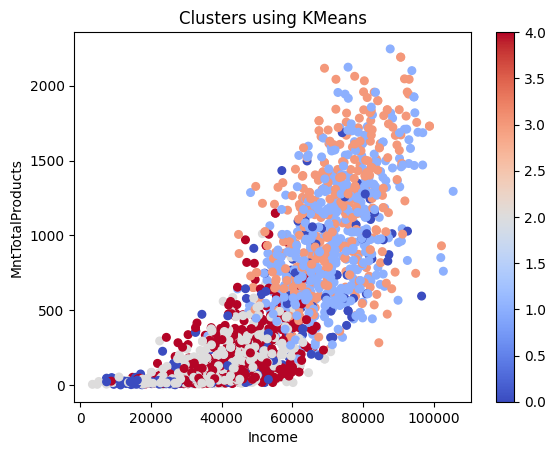

In [49]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [50]:
rough=data_clean.copy()


In [51]:
rough['Clust']=pd.Series(y_kmeans)

In [52]:
rough1=data_clean.copy()
rough1

,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married
0,58138.0,7,66,0,1269,21,1,0,0,0
1,46344.0,5,69,2,18,4,1,0,0,0
2,71613.0,4,58,0,602,11,1,0,0,1
3,26646.0,6,39,1,35,4,1,0,0,1
4,58293.0,5,42,1,334,13,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2189,61223.0,5,56,1,934,14,1,0,0,1
2190,64014.0,7,77,3,436,17,0,1,0,1
2191,56981.0,6,42,0,1173,6,1,0,0,0
2192,69245.0,3,67,1,672,13,0,1,0,1


In [53]:
rough[rough['Clust']==4]

,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married,Clust
4,58293.0,5,42,1,334,13,0,1,0,1,4
7,33454.0,8,38,1,142,6,0,1,0,1,4
8,30351.0,9,49,1,38,4,0,1,0,1,4
11,59354.0,6,71,2,288,10,0,1,0,0,4
19,58607.0,8,74,1,953,8,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2168,38054.0,7,73,2,42,4,0,1,0,0,4
2175,40101.0,7,38,1,303,11,0,1,0,1,4
2179,33562.0,4,60,3,45,5,0,1,0,1,4
2190,64014.0,7,77,3,436,17,0,1,0,1,4


In [54]:
model

KMeans(n_clusters=5)

In [55]:

from pickle import dump
from pickle import load

In [56]:
filename = 'final_model.pkl'
dump(model, open(filename, 'wb'))

In [57]:
classifier = load(open('final_model.pkl', 'rb'))

In [58]:
m=classifier.fit(rough1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
encoded_data = [50000,8,47,0,43,3,0,0,1,0]
data1=pd.DataFrame([encoded_data], columns=['Income', 'NumWebVisitsMonth','CustomerAge','Children', 'MntTotalProducts', 'NumTotalPurchases',
'Education_Graduation', 'Education_PostGraduation', 'Education_UnderGraduation','Marital_Status_Married'])

In [60]:
data1

,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married
0,50000,8,47,0,43,3,0,0,1,0


In [61]:
x=m.predict(data1)
x

array([3], dtype=int32)

In [62]:
y=pd.Series(x)

In [63]:
y.value_counts()

3    1
dtype: int64